In [42]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = pd.read_csv('./data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)

In [43]:
t = data['iyear'].value_counts()
x = t.index
y = t.values

lats = data['latitude'].to_list()
lons = data['longitude'].to_list()

k = data.groupby('iyear')['nkill'].sum()
victims = data['nkill'] + data['nwound']
terrorists = np.nan_to_num(data['nperps'])
t_list = np.asarray(terrorists[np.where(terrorists>20)])
names = data['gname'].unique()
#IS = data['gname'].filter(like='Islamic State')
print#(list(names))

<function print>

<BarContainer object of 47 artists>

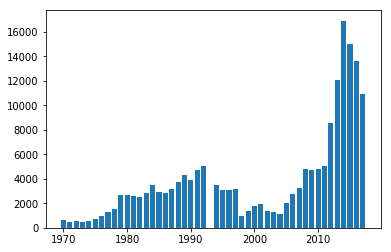

In [44]:
%matplotlib inline
plt.bar(x, y)

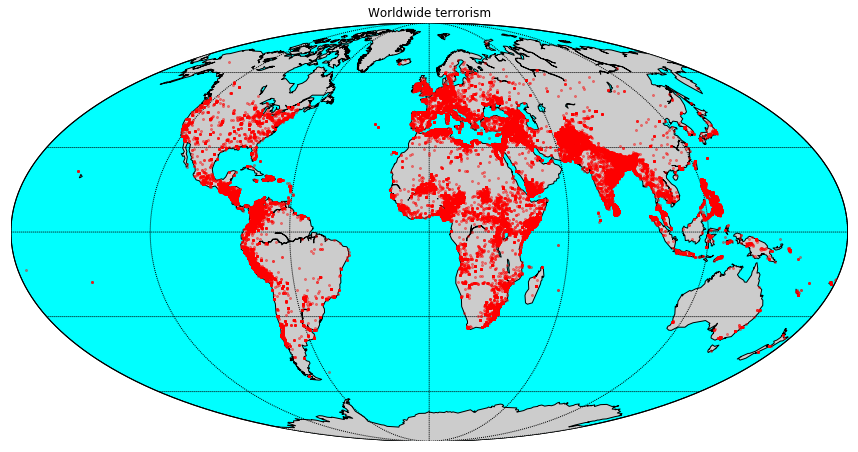

In [45]:
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='moll',resolution='c', lon_0=0)

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
x,y=m(lons,lats)
m.plot(x, y, 'go', markersize=2, color = 'r',alpha=0.4)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Worldwide terrorism")
plt.show()

In [46]:
plt.bar(year, k)

NameError: name 'year' is not defined

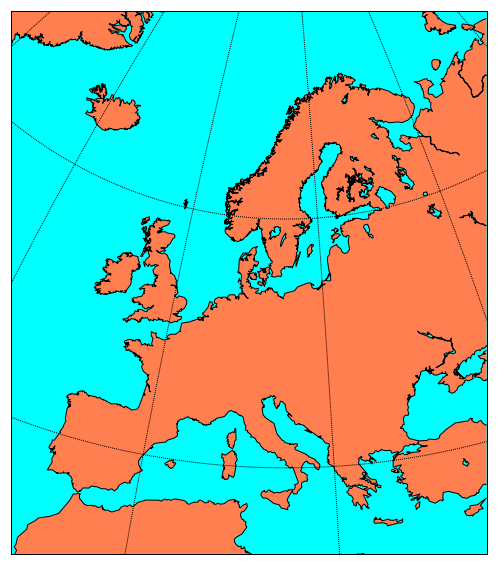

In [47]:
m2 = Basemap(llcrnrlon=-10.,llcrnrlat=30,urcrnrlon=65.,urcrnrlat=70.,\
            resolution='l',projection='stere',\
            lat_ts=50,lat_0=50,lon_0=15.)
m2.drawcoastlines()
m2.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m2.drawparallels(np.arange(-80.,81.,20.))
m2.drawmeridians(np.arange(-180.,181.,20.))
m2.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(20,10)